In [2]:
import scipy.stats as ss
import statsmodels.stats.power as smp
import numpy as np
from statsmodels.stats.power import TTestIndPower
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [26]:
#importar los datos
path = "C:/Users/Carola/Documents/Especializacion_bioinfo/ESTADISTICA/DataSets/tabla_trabajo_final.csv"
df_con_nan = pd.read_csv(path,sep=',')

descripcion general de los datos

In [29]:

nan_por_fila = df_con_nan.isna().sum(axis=1) #número de valores NaN en cada fila utilizando isna().sum(axis=1).
filas_a_eliminar = df_con_nan[nan_por_fila > 8] #filtra filas que tienen más de 5 valores NaN y se almacenan en la variable filas_a_eliminar
eliminadas = df_con_nan[nan_por_fila > 8].copy() #Armo un df con las filas que van a ser eliminadas
df = df_con_nan.drop(filas_a_eliminar.index) #elimina las filas con mas de 5 NaN

In [28]:
#separo la tabla en dos grupos, segun el valor que presenten en la columna "flag"
df_1 = df[df["flag"] == 1]
df_2 = df[df["flag"] == 2]


In [6]:
# En este código, Q1 y Q3 representan el percentil 2 y 98 de la columna "width", respectivamente. 
# Luego, se calcula el rango intercuartílico (IQR) como la diferencia entre Q3 y Q1.
# se crea idx que identifica los valores que están por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR). 
# Finalmente, se utiliza idx para filtrar los DataFrames  df_1 y df_2 y se les asigna el resultado a df_1_sin_outliers y df_2_sin_outliers
Q1 = df_1["width"].quantile(0.05)
Q3 = df_1["width"].quantile(0.95)
IQR = Q3 - Q1
df_1_sin_outliers = df_1[(df_1["width"] >= Q1 - 1.5 * IQR) & (df_1["width"] <= Q3 + 1.5 * IQR)]

Q1 = df_2["width"].quantile(0.05)
Q3 = df_2["width"].quantile(0.95)
IQR = Q3 - Q1
df_2_sin_outliers = df_2[(df_2["width"] >= Q1 - 1.5 * IQR) & (df_2["width"] <= Q3 + 1.5 * IQR)]


Contraste de hipotesis, test no parametricos 

Tabla de contingencia: relacion entre flag y presencia de NaN

In [38]:
import numpy as np
import math

is_spark = []
for item in df["flag"]:
    if item == 1:
        is_spark.append(True)
    elif item == 2:
        is_spark.append(False)    


is_nan = []
for item in df["sp_tau"]:
    if math.isnan(item):
        is_nan.append(False)
    else:
        is_nan.append(True)

print("is_nan: ",is_nan)  
print("is_spark: ",is_spark)  
        
data = {
    'is_spark': is_spark,
    'is_nan': is_nan
}        

df_contingencia = pd.DataFrame(data)


#comparamos los datos en una tabla de contingencia
a = df_contingencia ['is_spark'] == True
b = df_contingencia ['is_nan'] == True
groups = df_contingencia.groupby([a,b]).count() 

#Convertimos la tabla de contingencia a un array numpy
observed = groups.values

chi2, pvalue = ss.chisquare(groups, ddof=0, axis=0)

print("chi2 statistics", chi2)
print("pvalue", pvalue)


is_nan:  [True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, Tru

In [40]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# Obtener la tabla de contingencia
a = df_contingencia['is_spark'] == True
b = df_contingencia['is_nan'] == True
groups = df_contingencia.groupby([a, b]).size().unstack(fill_value=0)

# Convertir la tabla de contingencia en un DataFrame
df_tabla_contingencia = pd.DataFrame(groups)

# Imprimir la tabla de contingencia en formato Markdown
tabla_md = tabulate(df_tabla_contingencia, headers='keys', tablefmt='pipe')

print(tabla_md)


ModuleNotFoundError: No module named 'tabulate'

In [11]:
tabla_contingencia = pd.crosstab(df_contingencia['is_spark'], df_contingencia['is_nan'])
print(tabla_contingencia)



is_nan    False  True 
is_spark              
False       144   1102
True        123    967


Tabla de contingencia: relacion entre width y tiempo_valle

In [35]:
import math
import numpy as np
from scipy.stats import chisquare

#categorice las columnas, en dos grupos dependiendo de si estan por encima o por debajo de la media
width_under_mean = []
for value in df["width"]:
    if value <= 14.815603:
        width_under_mean.append(True)
    elif value > 14.815603:
        width_under_mean.append(False)    

tiempo_valle_under_mean = []
for value in df["tiempo_valle"]:
    if value <= 10.145120:
        tiempo_valle_under_mean.append(True)
    elif value > 10.145120:
        tiempo_valle_under_mean.append(False)  

print("width_under_mean: ",width_under_mean)  
print("tiempo_valle_under_mean: ",tiempo_valle_under_mean)  
 
#arme un df con las listas creadas anteriormente       
data_ = {
    "width_under_mean":width_under_mean,
    "tiempo_valle_under_mean": tiempo_valle_under_mean
}        

df_contingencia_ = pd.DataFrame(data_)

a = df_contingencia_["width_under_mean"]
b = df_contingencia_["tiempo_valle_under_mean"]

#comparamos los datos en una tabla de contingencia
groups = df_contingencia_.groupby([a,b]).count() 
print("print groups:")
print (groups)



width_under_mean:  [False, True, True, False, False, True, True, False, False, True, False, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, True, True, True, False, True, True, False, True, True, True, True, True, True, True, False, True, True, False, True, True, False, False, True, True, False, True, True, True, False, False, False, False, False, True, False, True, True, False, False, True, False, False, True, False, True, False, False, True, True, True, True, False, True, True, False, False, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, True, True, False, True, False, True, False, True, False, True, False, False, True, True, True, True, True, True, False, True, False, True, False, False, True, True, True, True, False, True, False, False, True, True, False, True, False, True, False, False, True, False, True, True, True, False, True, False, False, True, False, False, True, True, False, Tru

intervalo de confianza

Test de correlación

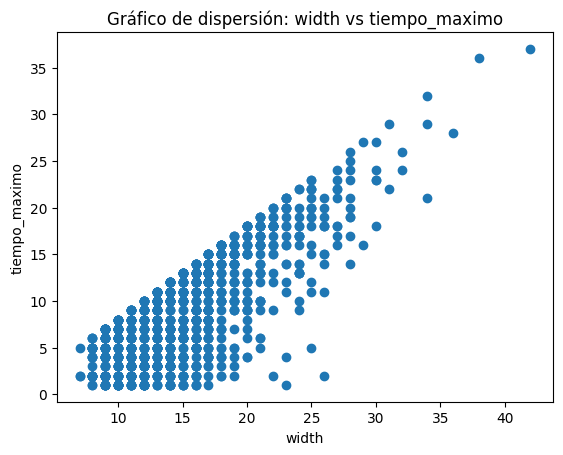

In [31]:
X = df_1_sin_outliers["width"]
Y = df_1_sin_outliers["tiempo_maximo"]

plt.scatter(X, Y)
plt.xlabel("width")
plt.ylabel("tiempo_maximo")
plt.title("Gráfico de dispersión: width vs tiempo_maximo")
plt.show()